In [1]:
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [68]:
directory = r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_Metric'
results = []

# 遍历作物文件夹
for crop in os.listdir(directory):
    crop_path = os.path.join(directory, crop)
    if os.path.isdir(crop_path):  # 确保是文件夹
        # 遍历模型文件
        for model_file in os.listdir(crop_path):
            if model_file.endswith('.csv'):
                file_path = os.path.join(crop_path, model_file)
                # 读取CSV文件
                df = pd.read_csv(file_path)
                
                # 提取BLEU-4和Average ROUGE F-score
                bleu_value = df.loc[df['Metric'] == 'BLEU-4', 'F-score'].values[0]
                avg_rouge_value = df.loc[df['Metric'] == 'Average ROUGE F-score', 'F-score'].values[0]
                
                # 去掉模型文件名中的.csv
                model_name = model_file[:-4]  # 去掉最后四个字符
                model_name = model_name.replace("rouge_bleu_", "")

                # 乘以1000并保留两位小数
                bleu_value = round(float(bleu_value) * 1000, 2)
                avg_rouge_value = round(float(avg_rouge_value) * 1000, 2)

                # 将结果存储在列表中
                results.append([crop, model_name, bleu_value, avg_rouge_value])

# 创建DataFrame
results_df = pd.DataFrame(results, columns=['Crop', 'Model', 'BLEU-4(‰)', 'Average ROUGE F-score(‰)'])

# 确保数值列是浮点型
results_df['BLEU-4(‰)'] = pd.to_numeric(results_df['BLEU-4(‰)'], errors='coerce')
results_df['Average ROUGE F-score(‰)'] = pd.to_numeric(results_df['Average ROUGE F-score(‰)'], errors='coerce')

# 去掉NaN值
results_df = results_df.dropna()

# 计算每个模型的BLEU-4和Average ROUGE F-score的平均值
average_results = results_df.groupby('Model', as_index=False).agg({
    'BLEU-4(‰)': 'mean',
    'Average ROUGE F-score(‰)': 'mean'
})

# 添加一列标记为“Average”
average_results['Crop'] = 'average'

# 将结果保存为CSV文件
final_results = pd.concat([results_df, average_results], ignore_index=True)
final_results.to_csv(r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_Metric\sum_metrics.csv', index=False)


In [ ]:
directory = r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_CMMLU\accuracy\summary\0shot'
combined_data = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        model_name = filename[:-4]  # 去掉.csv后缀
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df['Model'] = model_name  # 添加模型名字
        combined_data.append(df)

# 合并所有数据
final_df = pd.concat(combined_data, ignore_index=True)

# 调整列的顺序，将“Model”放到最前面
final_df = final_df[['Model'] + [col for col in final_df.columns if col != 'Model']]

# 保存为新的CSV文件
final_df.to_csv(r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_CMMLU\accuracy\summary\results_0shot.csv', index=False)

In [6]:
directory = r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_CMMLU\accuracy\summary\5shot'
combined_data = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        model_name = filename[:-4]  # 去掉.csv后缀
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df['Model'] = model_name  # 添加模型名字
        combined_data.append(df)

# 合并所有数据
final_df = pd.concat(combined_data, ignore_index=True)

# 调整列的顺序，将“Model”放到最前面
final_df = final_df[['Model'] + [col for col in final_df.columns if col != 'Model']]

# 保存为新的CSV文件
final_df.to_csv(r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_CMMLU\accuracy\summary\results_5shot.csv', index=False)


C:\Users\win\AppData\Local\Temp\ipykernel_22236\3809870694.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\3809870694.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\3809870694.py:91: UserWarning: set_ticklabels() shou

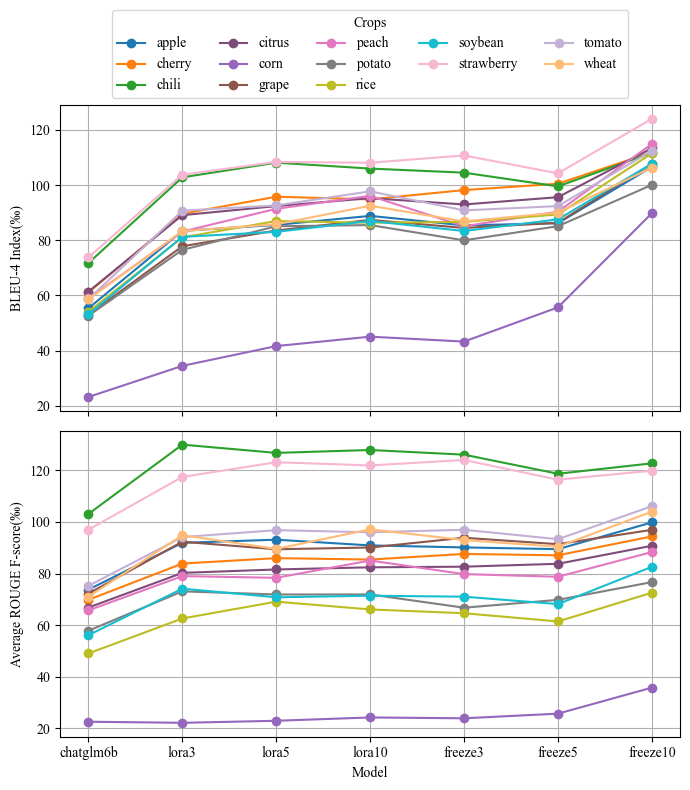

In [13]:
# 读取CSV文件
data = pd.read_csv('D:\student\lzy\CDIP-ChatGLM3\data\LLM_Metric\sum_metrics.csv')

# 获取所有作物和模型名称
crops = data['Crop'].unique()
models_to_exclude = ['freeze10_alpaca_10K', 'freeze10_alpaca_20K', 'freeze10_alpaca_5K']

# 过滤掉不需要的模型
data_filtered = data[~data['Model'].isin(models_to_exclude)]

# 定义模型排序顺序
model_order = ['chatglm6b', 'lora3', 'lora5', 'lora10', 'freeze3', 'freeze5', 'freeze10']

# 设置字体属性
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# 创建一个绘图，设置尺寸为（7, 10）
fig, axs = plt.subplots(2, 1, figsize=(7, 8))

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#7f4c7a', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#f7b6d2', '#c5b0d5', '#ffbb78', '#ff9896', '#c49c94'
]

# 创建颜色字典
color_dict = {crop: colors[i % len(colors)] for i, crop in enumerate(crops) if crop != 'average'}
color_dict['average'] = '#d62728'  # 将红色分配给average类别
color_dict['average'] = '#000000'
# 绘制每个作物的BLEU-4指数折线图
for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')
    
    if crop == 'average':
        # axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='^', label=crop, color=color_dict[crop], linewidth=2)
        # for i in range(len(crop_data)):
        #     model_name = crop_data['Model'].iloc[i]
        #     score_value = crop_data['BLEU-4(‰)'].iloc[i]
        #     axs[0].annotate(f'{score_value:.2f}', 
        #                     xy=(model_name, score_value),
        #                     xytext=(5, 5), 
        #                     textcoords='offset points',
        #                     fontsize=9,
        #                     color=color_dict[crop],
        #                     arrowprops=dict(arrowstyle='->', color=color_dict[crop]))
        pass
    else:    
        axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置BLEU-4图表属性
axs[0].set_ylabel('BLEU-4 Index(‰)')
axs[0].set_xticklabels([])
axs[0].legend(title='Crops', bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=5)
axs[0].grid()

# 绘制Average ROUGE F-score折线图
for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')

    if crop == 'average':
        # axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='^', label=crop, color=color_dict[crop], linewidth=2)
        # for i in range(len(crop_data)):
        #     model_name = crop_data['Model'].iloc[i]
        #     score_value = crop_data['Average ROUGE F-score(‰)'].iloc[i]
        #     axs[1].annotate(f'{score_value:.2f}', 
        #                     xy=(model_name, score_value),
        #                     xytext=(5, 5), 
        #                     textcoords='offset points',
        #                     fontsize=9,
        #                     color=color_dict[crop],
        #                     arrowprops=dict(arrowstyle='->', color=color_dict[crop]))
        pass
    else:
        axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置ROUGE图表属性
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Average ROUGE F-score(‰)')
axs[1].set_xticklabels(crop_data['Model'])
axs[1].grid()
for tick in axs[0].get_yticklabels():
    tick.set_fontname('Times New Roman')
for tick in axs[1].get_yticklabels():
    tick.set_fontname('Times New Roman')
# 保存并显示图表
plt.tight_layout()
plt.savefig('metrics_plot.png', dpi=300)
plt.show()


C:\Users\win\AppData\Local\Temp\ipykernel_22236\1787794552.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\1787794552.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\1787794552.py:89: UserWarning: set_ticklabels() shou

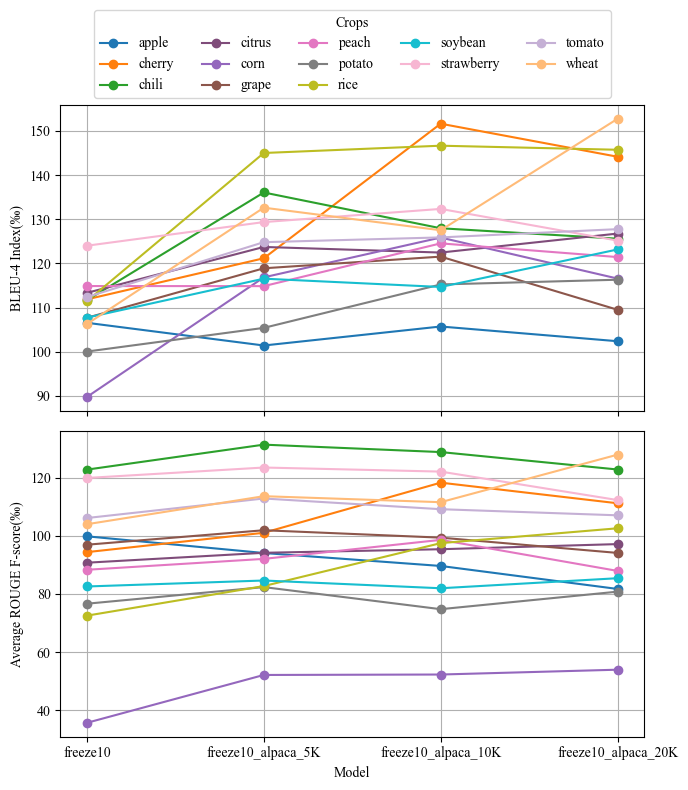

In [12]:
data = pd.read_csv('D:\student\lzy\CDIP-ChatGLM3\data\LLM_Metric\sum_metrics.csv')

# 获取所有作物和模型名称
crops = data['Crop'].unique()
models_to_exclude = ['chatglm6b', 'freeze3', 'freeze5','lora5','lora10','lora3']

# 过滤掉不需要的模型
data_filtered = data[~data['Model'].isin(models_to_exclude)]

# 定义模型排序顺序
model_order = ['freeze10', 'freeze10_alpaca_5K', 'freeze10_alpaca_10K', 'freeze10_alpaca_20K']

# 设置字体属性
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# 创建一个绘图，设置尺寸为（7, 8）
fig, axs = plt.subplots(2, 1, figsize=(7, 8))

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#7f4c7a', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#f7b6d2', '#c5b0d5', '#ffbb78', '#ff9896', '#c49c94'
]

# 创建颜色字典
color_dict = {crop: colors[i % len(colors)] for i, crop in enumerate(crops) if crop != 'average'}
# color_dict['average'] = '#d62728'  # 将红色分配给average类别
# color_dict['average'] = '#000000'

for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')
    
    if crop == 'average':
        # axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='^', label=crop, color=color_dict[crop], linewidth=2)
        # for i in range(len(crop_data)):
        #     model_name = crop_data['Model'].iloc[i]
        #     score_value = crop_data['BLEU-4(‰)'].iloc[i]
        #     axs[0].annotate(f'{score_value:.2f}', 
        #                     xy=(model_name, score_value),
        #                     xytext=(5, 5), 
        #                     textcoords='offset points',
        #                     fontsize=9,
        #                     color=color_dict[crop],
        #                     arrowprops=dict(arrowstyle='->', color=color_dict[crop]))
        pass
    else:    
        axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置BLEU-4图表属性
axs[0].set_ylabel('BLEU-4 Index(‰)')
axs[0].set_xticklabels([])
axs[0].legend(title='Crops', bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=5)
axs[0].grid()

# 绘制Average ROUGE F-score折线图
for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')

    if crop == 'average':
        # axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='^', label=crop, color=color_dict[crop], linewidth=2)

        # # 遍历所有模型，标注每个点的值
        # for i in range(len(crop_data)):
        #     model_name = crop_data['Model'].iloc[i]
        #     score_value = crop_data['Average ROUGE F-score(‰)'].iloc[i]
        #     axs[1].annotate(f'{score_value:.2f}', 
        #                     xy=(model_name, score_value),
        #                     xytext=(5, 5), 
        #                     textcoords='offset points',
        #                     fontsize=9,
        #                     color=color_dict[crop],
        #                     arrowprops=dict(arrowstyle='->', color=color_dict[crop]))
        pass
    else:
        axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置ROUGE图表属性
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Average ROUGE F-score(‰)')
axs[1].set_xticklabels(crop_data['Model'])
axs[1].grid()
for tick in axs[0].get_yticklabels():
    tick.set_fontname('Times New Roman')
for tick in axs[1].get_yticklabels():
    tick.set_fontname('Times New Roman')
# 保存并显示图表
plt.tight_layout()
plt.savefig('metrics_plot_2.png', dpi=300)
plt.show()

C:\Users\win\AppData\Local\Temp\ipykernel_22236\200858142.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\200858142.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\200858142.py:131: UserWarning: set_ticklabels() should

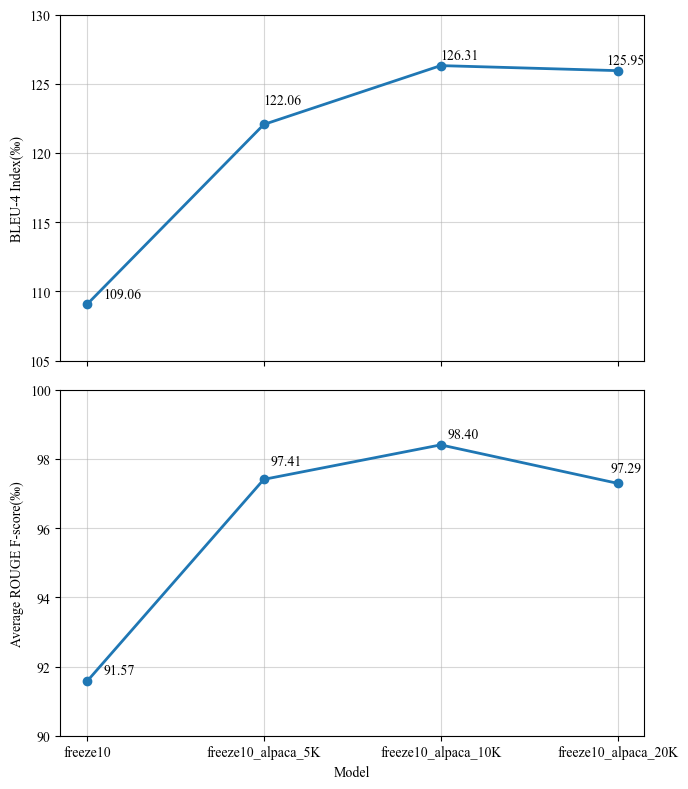

In [11]:
data = pd.read_csv('D:\student\lzy\CDIP-ChatGLM3\data\LLM_Metric\sum_metrics.csv')

# 获取所有作物和模型名称
crops = data['Crop'].unique()
models_to_exclude = ['chatglm6b', 'freeze3', 'freeze5','lora5','lora10','lora3']

# 过滤掉不需要的模型
data_filtered = data[~data['Model'].isin(models_to_exclude)]

# 定义模型排序顺序
model_order = ['freeze10', 'freeze10_alpaca_5K', 'freeze10_alpaca_10K', 'freeze10_alpaca_20K']

# 设置字体属性
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# 创建一个绘图，设置尺寸为（7, 8）
fig, axs = plt.subplots(2, 1, figsize=(7, 8))

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#7f4c7a', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#f7b6d2', '#c5b0d5', '#ffbb78', '#ff9896', '#c49c94'
]

# 创建颜色字典
color_dict = {crop: colors[i % len(colors)] for i, crop in enumerate(crops) if crop != 'average'}
color_dict['average'] = '#1f77b4'  # 将红色分配给average类别

for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')
    
    if crop == 'average':
        axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='o', label=crop, color=color_dict[crop], linewidth=2)
        for i in range(len(crop_data)):
            model_name = crop_data['Model'].iloc[i]
            score_value = crop_data['BLEU-4(‰)'].iloc[i]
            if i == 0:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(12, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 1:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(0, 15), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 2:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(0, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 3:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(-8, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
    # else:    
    #     axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置BLEU-4图表属性
axs[0].set_ylabel('BLEU-4 Index(‰)')
axs[0].set_xticklabels([])
axs[0].set_ylim(105, 130)  # 设置y轴上限为100
# axs[0].legend(title='Crops', bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=5)
axs[0].grid()
axs[0].grid(alpha=0.5)  # 设置网格线的透明度
# 绘制Average ROUGE F-score折线图
for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')

    if crop == 'average':
        axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='o', label=crop, color=color_dict[crop], linewidth=2)

        # 遍历所有模型，标注每个点的值
        for i in range(len(crop_data)):
            model_name = crop_data['Model'].iloc[i]
            score_value = crop_data['Average ROUGE F-score(‰)'].iloc[i]
            if i == 0:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(12, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 1:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 10), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 2:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 3:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(-5, 8), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')

    # else:
    #     axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置ROUGE图表属性
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Average ROUGE F-score(‰)')
axs[1].set_ylim(90, 100)  # 设置y轴上限为100
axs[1].set_xticklabels(crop_data['Model'])
axs[1].grid(alpha=0.5)  # 设置网格线的透明度
for tick in axs[0].get_yticklabels():
    tick.set_fontname('Times New Roman')
for tick in axs[1].get_yticklabels():
    tick.set_fontname('Times New Roman')
# 保存并显示图表
plt.tight_layout()
plt.savefig('metrics_plot_2_single.png', dpi=300)
plt.show()

C:\Users\win\AppData\Local\Temp\ipykernel_22236\716439244.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\716439244.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
C:\Users\win\AppData\Local\Temp\ipykernel_22236\716439244.py:172: UserWarning: set_ticklabels() shoul

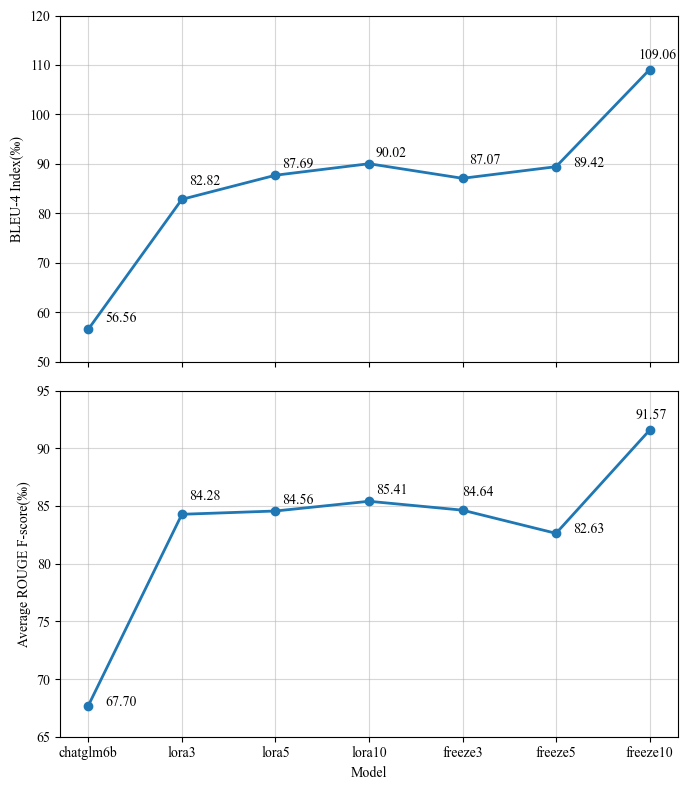

In [10]:
# 读取CSV文件
data = pd.read_csv('D:\student\lzy\CDIP-ChatGLM3\data\LLM_Metric\sum_metrics.csv')

# 获取所有作物和模型名称
crops = data['Crop'].unique()
models_to_exclude = ['freeze10_alpaca_10K', 'freeze10_alpaca_20K', 'freeze10_alpaca_5K']

# 过滤掉不需要的模型
data_filtered = data[~data['Model'].isin(models_to_exclude)]

# 定义模型排序顺序
model_order = ['chatglm6b', 'lora3', 'lora5', 'lora10', 'freeze3', 'freeze5', 'freeze10']

# 设置字体属性
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# 创建一个绘图，设置尺寸为（7, 10）
fig, axs = plt.subplots(2, 1, figsize=(7, 8))

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#7f4c7a', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#f7b6d2', '#c5b0d5', '#ffbb78', '#ff9896', '#c49c94'
]

# 创建颜色字典
color_dict = {crop: colors[i % len(colors)] for i, crop in enumerate(crops) if crop != 'average'}
color_dict['average'] = '#1f77b4'  # 将红色分配给average类别

# 绘制每个作物的BLEU-4指数折线图
for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')
    
    if crop == 'average':
        axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='o', label=crop, color=color_dict[crop], linewidth=2)
        for i in range(len(crop_data)):
            model_name = crop_data['Model'].iloc[i]
            score_value = crop_data['BLEU-4(‰)'].iloc[i]
            if i == 0:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(12, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 1:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 10), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 2:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 3:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 4:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 10), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 5:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(12, 0), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 6:
                axs[0].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(-8, 8), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
    # else:    
    #     axs[0].plot(crop_data['Model'], crop_data['BLEU-4(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置BLEU-4图表属性
axs[0].set_ylabel('BLEU-4 Index(‰)')
axs[0].set_xticklabels([])
axs[0].grid(alpha=0.5)
axs[0].set_ylim(50, 120)  # 设置y轴上限为100
# 绘制Average ROUGE F-score折线图
for crop in crops:
    crop_data = data_filtered[data_filtered['Crop'] == crop]
    
    # 将模型按照定义的顺序排序
    crop_data['Model'] = pd.Categorical(crop_data['Model'], categories=model_order, ordered=True)
    crop_data = crop_data.sort_values('Model')

    if crop == 'average':
        axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='o', label=crop, color=color_dict[crop], linewidth=2)
        for i in range(len(crop_data)):
            model_name = crop_data['Model'].iloc[i]
            score_value = crop_data['Average ROUGE F-score(‰)'].iloc[i]
            if i == 0:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(12, 0), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 1:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 10), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 2:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 3:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(5, 5), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 4:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(0, 10), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 5:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(12, 0), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
            if i == 6:
                axs[1].annotate(f'{score_value:.2f}', 
                                xy=(model_name, score_value),
                                xytext=(-10, 8), 
                                textcoords='offset points',
                                fontsize=10,
                                color='#000000')
    # else:
    #     axs[1].plot(crop_data['Model'], crop_data['Average ROUGE F-score(‰)'], marker='o', label=crop, color=color_dict[crop])

# 设置ROUGE图表属性
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Average ROUGE F-score(‰)')
axs[1].set_xticklabels(crop_data['Model'])
axs[1].grid(alpha=0.5)
axs[1].set_ylim(65, 95)  # 设置y轴上限为100
for tick in axs[0].get_yticklabels():
    tick.set_fontname('Times New Roman')
for tick in axs[1].get_yticklabels():
    tick.set_fontname('Times New Roman')
# 保存并显示图表
plt.tight_layout()
plt.savefig('metrics_plot_single.png', dpi=300)
plt.show()


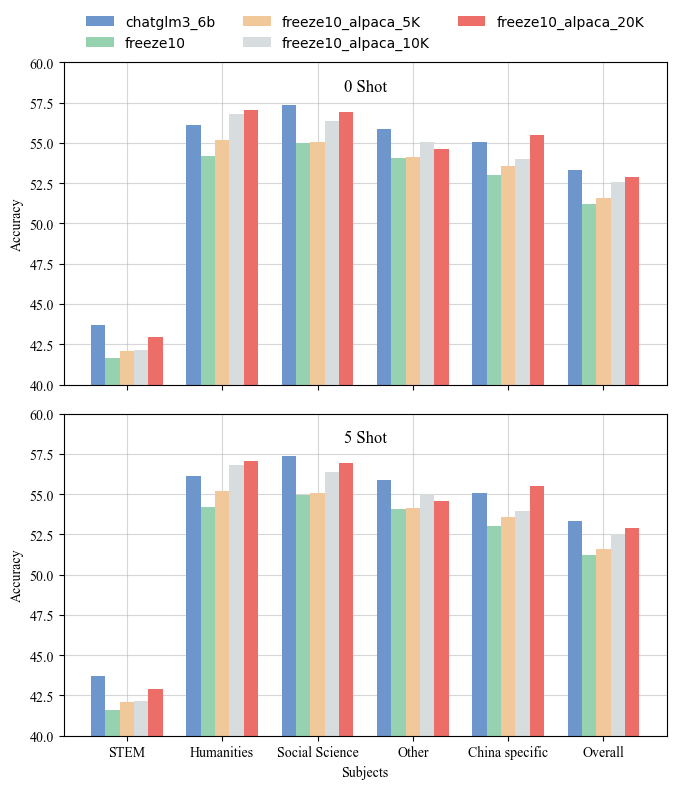

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
data = pd.read_csv(r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_CMMLU\accuracy\summary\results_0shot.csv')
data_2 = pd.read_csv(r'D:\student\lzy\CDIP-ChatGLM3\data\LLM_CMMLU\accuracy\summary\results_0shot.csv')  # 确保这是不同的数据文件
# 指定模型的摆放顺序
model_order = ['chatglm3_6b', 'freeze10', 'freeze10_alpaca_5K', 'freeze10_alpaca_10K', 'freeze10_alpaca_20K']
data['Model'] = pd.Categorical(data['Model'], categories=model_order, ordered=True)
data_2['Model'] = pd.Categorical(data_2['Model'], categories=model_order, ordered=True)  # 确保第二个数据的模型顺序相同

# 获取每个Subject的模型和准确性
subjects = data['Subject'].unique()
models = data['Model'].cat.categories

# 设置柱状图的宽度
bar_width = 0.15
x = np.arange(len(subjects))

# 创建绘图
fig, axs = plt.subplots(2, 1, figsize=(7, 8))
axs[0].grid(alpha=0.5, zorder=0)  # 设置网格线的 zorder
axs[1].grid(alpha=0.5, zorder=0)

colors = ['#6C96CC', '#96D2B0', '#F1C89A', '#D7DDDF', '#ED6E69']

# 第一个子图
for i, model in enumerate(models):
    model_data = data[data['Model'] == model]['Accuracy']
    axs[0].bar(x + i * bar_width, model_data, width=bar_width, label=model, color=colors[i], zorder=2)  # 设置柱状图的 zorder

axs[0].set_ylabel('Accuracy', fontsize=10, fontname='Times New Roman')
axs[0].set_xticks(x + bar_width * (len(models) - 1) / 2)
axs[0].set_xticklabels([], rotation=45, fontname='Times New Roman')
axs[0].set_ylim(40, 60)
axs[0].legend(bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=3, frameon=False)
axs[0].text(0.5, 0.90, '0 Shot', fontsize=12, fontname='Times New Roman', ha='center', va='bottom', transform=axs[0].transAxes)

# 第二子图
for i, model in enumerate(models):
    model_data = data_2[data_2['Model'] == model]['Accuracy']
    axs[1].bar(x + i * bar_width, model_data, width=bar_width, label=model, color=colors[i], zorder=2)  # 设置柱状图的 zorder

axs[1].set_xlabel('Subjects', fontsize=10, fontname='Times New Roman')
axs[1].set_ylabel('Accuracy', fontsize=10, fontname='Times New Roman')
axs[1].set_xticks(x + bar_width * (len(models) - 1) / 2)
axs[1].set_xticklabels(subjects, rotation=0, fontname='Times New Roman')
axs[1].set_ylim(40, 60)
axs[1].text(0.5, 0.90, '5 Shot', fontsize=12, fontname='Times New Roman', ha='center', va='bottom', transform=axs[1].transAxes)
# 设置 y 轴刻度标签为新罗马字体
for tick in axs[0].get_yticklabels():
    tick.set_fontname('Times New Roman')
for tick in axs[1].get_yticklabels():
    tick.set_fontname('Times New Roman')

plt.tight_layout()
plt.savefig('cmmlu_combined.png', dpi=300)
plt.show()
